# Proyecto 1: Identificando números con imágenes
En este ejercicio analizaras e identificarás números dados en la forma de imagen. Para ello puedes utilizar tu solución preferida identificar grupos de imágenes similares. Por ejemplo, puedes aplicar reducción de dimensionalidad antes o después del entrenamiento, puedes también elegir no usarlo. Para hacer la predicción puedes hacer uso de un método de agrupamiento y resolver la tarea con aprendizaje no supervisado, o puedes utilizar un algoritmo de clasificación y elegir el camino de aprendizaje supervisado.

A diferencia de los ejercicios anteriores donde programaste las soluciones analíticas a los métodos de ML, en este proyecto se recomienda el uso de las funciones y clases integradas de scikit-learn. Para entender el uso de estas clases y ver algunos ejemplos puedes consultar la documentación oficial
- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [DBScan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

En este proyecto tendrás que elegir que método de reducción de dimensionalidad y que método de agrupamiento deseas aplicar a tus datos. Es tu trabajo analizar la información dada para tomar estas decisiones. Lee con atención todas las instrucciones y celdas de código, y recuerda agregar tu código en todas las partes donde veas la instrucción "`TODO`"

## Descripción
Tu trabajo es identificar grupos en imágenes para reconocimiento de números. Para esto, deberás realizar los siguientes pasos:
1. Dado que nuestros datos están en diferentes escalas, es necesario normalizar los datos.
2. Aplicar un método de reducción de dimensionalidad y visualizar los datos
3. Buscar grupos en los datos reducidos con alguna técnica de agrupamiento o clasificación.
4. Interpretar los resultados.
5. Dadas dos imágenes nuevas, identificar a que grupo pertenece. (Inferencia)

Nota como existen múltiples soluciones a este problema. La decisión de como resolverlo es tuya (: intenta hacerlo lo mejor posible!
Comenzamos por importar las librerías correspondientes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

 ## 1. Analizando los datos
 Comenzamos leyendo nuestros datos y visualizando algunos ejemplos para analizarlos. En este caso utilizaremos el [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py). En este dataset encontrarás 1797 imágenes de 8x8. Cada imagen es un dígito escrito a mano. Primero separaremos los datos en entrenamiento y validación

 Recuerda! los datos de entranmiento *son los únicos* que puedes usar para entrenar tus modelos. El conjunto de validación solo se utilizará para evaluar el rendimiento de los modelos que elijas.

In [3]:
# Cargamos nuestros datos y los separamos en entrenamiento y validación
data, labels = load_digits(return_X_y=True)

# El 25% de los datos se asignará aleatoriamente a validación
data_train, data_val, target_train, target_val = train_test_split(
    data, 
    labels, 
    test_size=0.25
)
print(f"Imágenes en rango {np.max(data)}, {np.min(data)}")

# Entrenamiento
(n_samples, n_features), n_digits = data_train.shape, np.unique(target_train).size
print(f"# Dígitos: {n_digits}; # Muestras de entrenamiento: {n_samples}; # Variables {n_features}")

# Validación
(n_samples, n_features), n_digits = data_val.shape, np.unique(target_val).size
print(f"# Dígitos: {n_digits}; # Muestras de validación: {n_samples}; # Variables {n_features}")

Imágenes en rango 16.0, 0.0
# Dígitos: 10; # Muestras de entrenamiento: 1347; # Variables 64
# Dígitos: 10; # Muestras de validación: 450; # Variables 64


En este ejercicio las imágenes se entregan como un vector de 64 variables, donde cada elemento corresponde al valor de un pixel. Para visualizar los datos en forma de imagen, es necesario transformarlos a la forma adecuada. En las siguiente celda puedes ver algunas imágenes de ejemplo, así como la forma en que podemos transformar el vector de variables a una matriz de 8x8.

<Figure size 640x480 with 0 Axes>

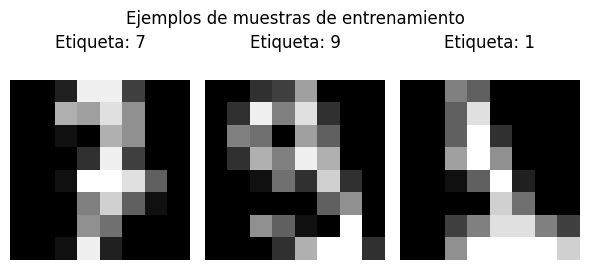

In [4]:
plt.gray()

# Visualizar algunas imágenes
n_cols = 3
idx = np.random.randint(len(data_train), size=n_cols)
fig, axes = plt.subplots(1, n_cols, figsize=(6,3))
axes = axes.flatten()
for ax, i in zip(axes, idx):
    side = np.sqrt(len(data_train[i])).astype('int')
    # La imagen está dada como un solo vector de longitud 64
    # Cambiamos la forma para tenerla en forma de imagen de 8x8 pixeles
    img = data[i].reshape((side, side))
    ax.matshow(img)
    ax.axis('off')
    ax.set_title(f"Etiqueta: {labels[i]}")
fig.suptitle("Ejemplos de muestras de entrenamiento")
plt.tight_layout()
plt.show()

## Visualización en baja dimensionalidad
En la siguiente celda puedes visualizar como se ven tus datos reduciendo la dimensionalidad de 30 variables a 2. Explora usar TSNE y PCA, y elige el que te de mejor información.

Considera que durante inferencia, siempre trabajaremos con los datos de validación exclusivamente y solo se utilizarán los de entrenamiento para entrenar.

¿Cual método de reducción de dimensionalidad funciona mejor en este caso?


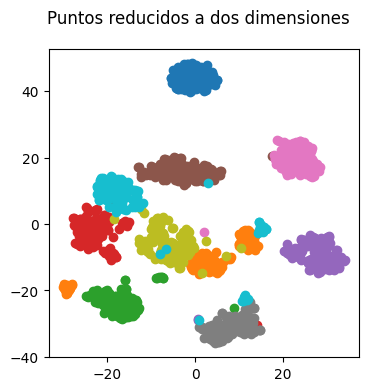

In [5]:
# TODO Reducimos la dimensionalidad de los datos DE VALIDACIÓN data_val
# a 2 dimensiones usando TSNE y/o PCA
tsne = TSNE(n_components=2, perplexity=50)
reduced_data_val =  tsne.fit_transform(data_train)

labels = np.unique(target_train)
#print(labels)
fig, ax_pca = plt.subplots(1, 1, figsize=(4,4))
fig.suptitle("Puntos reducidos a dos dimensiones")
for c in labels:
    indices = np.where(target_train == c)
    plot_data = reduced_data_val[indices]
    ax_pca.scatter(plot_data[:, 0], plot_data[:, 1], label=f"Grupo {c}")
plt.show()

Para la imagen anterior, explica detalladamente que información nos da sobre el dataset.
>Nos muestra con los 10 grupos de colores, que existen 10 categorías en las cuales podría caer un numéro. Además, los números del mismo color (misma etiqueta) quedan cerca entre si al reducir la dimensionalidad (no tomando en cuenta outliers), por lo que, las imágenes con la misma etiqueta, forman clústers.

# 2. Funciones de utilidad
En la siguiente sección definimos algunas funciones que podrías llegar a necesitar. Esto depende completamente de cómo decidas implementar tu algoritmo. Lee la descripción de las siguientes funciones y determina si las necesitas.

In [6]:
# DBScan no tiene una definición para predecir nuevos datos,
# puedes usar el siguiente código para hacer inferencia con dbscan
import scipy as sp
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 
    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break
    return y_new

# 3. Tu turno!
Datos los datos `data_train` con las etiquetas `target_train` define y entrena un algoritmo que identifique dígitos. Puedes utilizar tu método preferido. Utiliza las librerías de scikit learn. En la sección de abajo encontrarás un código que puedes usar para probar tu algoritmo. Agrega el código necesario en el método de `mi_modelo` para entrenar el modelo que decidas usar

## Modelo de agrupamiento

In [7]:
# Instanciamos la normalización de datos.
# Comó validación debe estar completamente disjunto de entrenamiento
# Seleccionamos los valores de normalización usando los datos de entrenamiento
# y aplicamos la misma normalización a ambos
scaler = StandardScaler()
scaler.fit(data_train)

def mi_modelo(X, label):
    '''
        args:
            - X (nd.array): Arreglo de dimensionalidad (N, D) donde D=64 conteniendo las imágenes en forma de vector
            - label (nd.array, tipo int): Arreglo de dimensionalidad (N,) conteniendo las etiquetas de clase/grupo para cada imagen
        returns:
            - model (object): Instancia de clase del modelo entrenado en los datos X normalizados
    '''
    # Normalizamos los datos de entrenamiento
    
    data = scaler.transform(X)

    # TODO: Entrena el modelo y regresa el modelo entrenado en los datos de entrenamiento.
    # Entrena tu modelo con los DATOS NORMALIZADOS
    
    model = LogisticRegression() 
    model.fit(data, label)
    
    return model
    

def mi_inferencia(modelo, X_val):
    '''
        args:
            - modelo(object): Instancia de la clase del modelo que estés utilizando
            - X_val(np.ndarray): Arreglo de dimensionalidad (N, D) donde D=64 conteniendo las imágenes en forma de vector
        returns:
            - preds(np.ndarray, tipo int): Arreglo de dimensionalidad (N,) conteniendo las predicciones de clase/grupo para cada imagen
    '''
    # Normalizamos los datos de validación
    # El mismos preprocesamiento de datos se aplica a
    # tanto inferencia como entrenamiento

    data = scaler.transform(X_val)

    # TODO: Utiliza el modelo para predecir valores para los datos de validación
    # Regresa las predicciones de tu modelo para X_val.
    # Aplica inferencia sobre los DATOS NORMALIZADOS

    preds = modelo.predict(data)
    
    return preds

# Utilizamos solo los datos de entrenamiento (alta dimensionalidad) para entrenar

modelo = mi_modelo(data_train, target_train)

# Utilizamos los datos de validacion (alta dimensionalidad) para hacer inferencia
# con el modelo entrenado

pred = mi_inferencia(modelo, data_val) #data_val


# 4. Evaluación y análisis de las predicciones
En esta sección incluimos funciones que te permiten visualizar la predicción de tu modelo para el set de validación. Dado que nuestros datos son de alta dimensionalidad (64) necesitamos reducirlos para poder analizar las predicciones. Recuerda que en esta sección solo funcionará si has definido tu modelo correctamente en el método anterior `mi_modelo`. Recuerda que en esta sección nos interesa mostar el rendimiento del modelo en los datos de *validación*.

## 4.1 (Inferencia) Predicciones en baja dimensionalidad
\# TODO:

Diseña un programa tal que puedas visualizar **las predicciones de TU modelo** de el dataset de validación en baja dimensionalidad. 
- Utiliza el método de reducción de dimensionalidad que consideres te ayude mejor a analizar tus datos. 
- Cada clase/grupo deberá mostrarse en un color diferente.
- Además de visualizar las predicciones, visualiza las predicciones **correctas**
- Puedes basarte en el código al inicio del notebook para mostrar los puntos o en los ejercicios pasados.
- Revisa el pdf adjunto tal que observes cómo deberías presentar tus resultados.

Datos (450, 64), predicciones (450,), clases/grupos 10


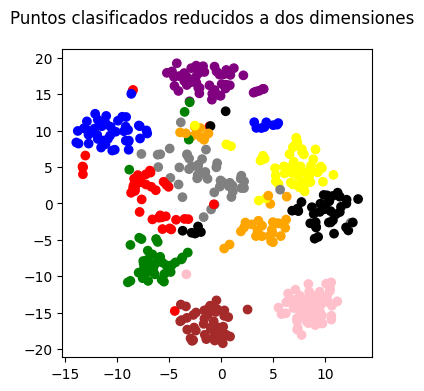

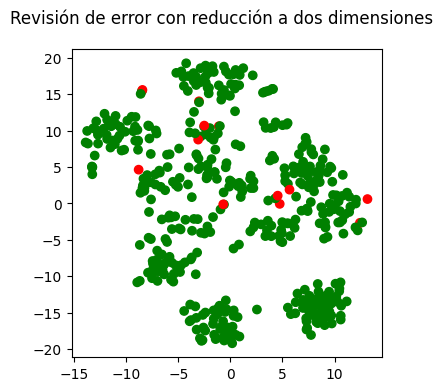

In [8]:
# Llamamos a inferencia de su modelo
# preds deberá ser de la forma N,1
# indicando el número al que corresponde cada imagen
preds = mi_inferencia(modelo, data_val)

# Buscamos la cantidad de grupos/clases que hay en los datos de validación
group_pred = np.unique(preds)
n_groups = len(group_pred)
print(f"Datos {data_val.shape}, predicciones {preds.shape}, clases/grupos {n_groups}")

fig, ax_reduced = plt.subplots(1, 1, figsize=(4,4))
fig.suptitle("Puntos clasificados reducidos a dos dimensiones")

# TODO: Grafíca los datos DE VALIDACIÓN reducidos (reduced_data_val)
# con un color distinto para cada grupo/clase que tu modelo ha predecido (preds)
#========== Start =========
tsne = TSNE(n_components=2, perplexity=50)
reduced_data_val =  tsne.fit_transform(data_val)
pred_plot = np.array([preds])
entry = np.hstack((reduced_data_val,pred_plot.T))

en = np.transpose(entry)

x = en[0,:] 
y = en[1,:]
w = en[2,:]
colores = [None]*len(x)
for i in range(len(x)):
    if w[i]==0:
        j="pink"
    if w[i]==1:
        j="red"
    if w[i]==2:
        j="blue"
    if w[i]==3:
        j="yellow"
    if w[i]==4:
        j="green"
    if w[i]==5:
        j="orange"
    if w[i]==6:
        j="brown"
    if w[i]==7:
        j="purple"
    if w[i]==8:
        j="gray"
    if w[i]==9:
        j="black"
    colores[i] = j
plt.scatter(x[:], y[:], c=colores[:])

#Obteniendo el color correcto o incorrecto
fig1, ax_reduced1 = plt.subplots(1, 1, figsize=(4,4))
fig1.suptitle("Revisión de error con reducción a dos dimensiones")
for i in range(len(x)):
    if preds[i]==target_val[i]:
        j="green"
    else:
        j="red"
    colores[i] = j
plt.scatter(x[:], y[:], c=colores[:])
#========== End ===========
#plt.show()
#plt.legend()

## 4.2 (Inferencia) Visualizar imagenes en cada grupo/clase
Completa el código de la siguiente celda. El siguiente código llama al método de inferencia anteriormente definido. Deberás mostrar al menos 1 imagen por cada grupo de predicción de tu modelo. Puedes intentar seleccionar una imagen representativa del grupo, o también puedes mostrar n imágenes aleatorias por cada grupo/clase. El objetivo de esto es analizar lo que ha aprendido tu modelo.

#### Métodos de clasificación
Si utilizaste un método de clasificación multiclase, los esperable sería que el valor real de la muestra (GT) sea igual al valor de la predicción para al menos la mayoría de los casos.

#### Métodos de agrupamiento
Si utilizaste un algoritmo de agrupamiento, es esperable que el valor real de la muestra (GT) no sea igual al grupo de tu predicción. Recuerda que al ser aprendizaje no supervisado, necesitamos adicionalmente "mapear" los grupos que haya encontrado el algoritmo a los reales. Puedes usar esta sección para hacer dicho mapeo. Lo mas sencillo es usar un diccionario

[241, 24, 116, 353, 408, 306, 431, 69, 282, 338]


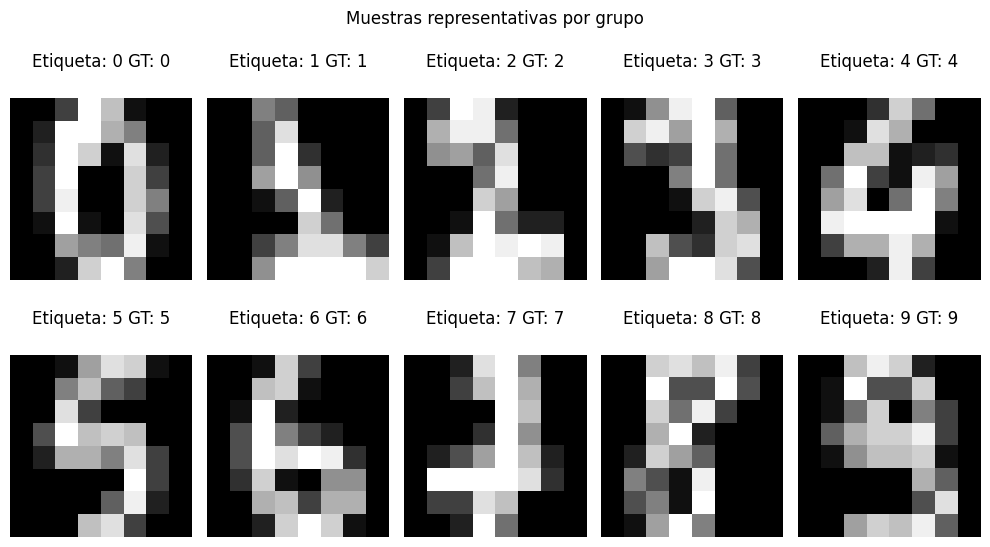

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# Llamamos a inferencia de su modelo
# Este método regresará las clases/grupos
# que haya encontrado para cada punto de validación
preds = mi_inferencia(modelo, data_val)

# Clases/grupos distintos de predicciones
group_pred = np.unique(preds)
n_groups = len(group_pred)

# Graficar
n_cols = 5
fig, axes = plt.subplots(n_groups//n_cols, n_cols, figsize=(10,6))  # Puedes cambiar o eliminar esta linea si lo consideras necesario.
axes = axes.flatten() # Convertir los axes a lista para poder iterarlos
# TODO: Muestra una imagen por cada grupo/clase de preddicion
#========== Start =========

idx = [None]*len(group_pred)
for i,label in enumerate(group_pred):
    it = np.where(label == preds)
    i_rand = np.random.randint(len(it[0]))
    idx[i] = it[0][i_rand]
print(idx)

num = 0 
for ax, i in zip(axes, idx):
    side = np.sqrt(len(data_val[i])).astype('int')
    img = data_val[i].reshape((side, side)) #Las matrices de validación son las imágenes 
    ax.matshow(img)
    ax.axis('off')
    ax.set_title(f"Etiqueta: {labels[num]} GT: {target_val[i]}")
    num = num+1
#========== End ===========
fig.suptitle("Muestras representativas por grupo")
plt.tight_layout()
plt.show()

print(target_val[idx]) #para comparar
print(preds[idx]) #para comparar

## 4.3 (Inferencia) Calculando el accuracy
En la siguiente celda calcula una métrica (un valor numérico) para TODO el conjunto de validación donde indiques cuantas muestras en promedio clasifica tu modelo correctamente.

In [10]:
datos = data_val
etiquetas = target_val
predicciones = mi_inferencia(modelo, datos)

# TODO: Calcula el "accuracy" promedio
train_accuracy = np.where(target_val == predicciones)[0].shape[0]/len(target_val) #cantidad de veces en que coinciden/cantidad de datos
print(train_accuracy)


0.9733333333333334


En base a lo que puedes observar en las celdas anteriores de esta sección, responde:
- ¿Consideras que tu algoritmo ha aprendido algo que tiene sentido? 

    *Si, el algoritmo clasifica con una elevada precisión los datos que se ingresan.*
- ¿Qué aprendió tu modelo?
    
    *Logró clasificar exitosamente las imagenes del set de validación acorde al entrenamiento que se le ha dado.*
- ¿Cómo podrías generar una métrica para evaluar el rendimiento en validación? 
    
    *Al dividir la cantidad de etiquetas correctas cobre la cantidad total de etiquetas es posible conocer el valor procentual de aciertos.*
- ¿Cuál es el rendimiento de tu modelo en validación? (De preferencia proporciona un número y analízalo)
    
    *Nuestra operación da una puntuación de 0.9756, lo que significa que 97 de cada 100 veces nuestro algoritmo da una predicción correcta.* 
- ¿En que situaciones falla?
    
    *Solo en casos muy complejos, que el número sea difícil de distinguir incluso para un humano. Puede fallar aproximadamente 3 de cada 100 veces.*
- ¿A que crees que se deba esto?
    
    *A que los pixeles que deberían formar parte de líneas diferentes se encuentran muy cercanos entre sí y es difícil distinguir características que hacen que un número se vea diferente del otro.*
- ¿Cómo podrías mejorarlo?
    
    *Mejorando la resolución de las imagenes.*